In [1]:
# importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing essential librarues.

In [2]:
# Load Dataset:
header = ['Rank', 'Discipline', 'Year_Since_PHD', 'Year_Service', 'Sex', 'Salary']
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv',
                header = None,
                skiprows = 1,
                names = header)
df

,Rank,Discipline,Year_Since_PHD,Year_Service,Sex,Salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


Loading salary data from github and rename it's column name.

In [3]:
df.shape

(397, 6)

Checking data shape.

# EDA Begins

# Discover and visualization of data

In [4]:
df.columns

Index(['Rank', 'Discipline', 'Year_Since_PHD', 'Year_Service', 'Sex',
       'Salary'],
      dtype='object')

Checking columns name.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            397 non-null    object
 1   Discipline      397 non-null    object
 2   Year_Since_PHD  397 non-null    int64 
 3   Year_Service    397 non-null    int64 
 4   Sex             397 non-null    object
 5   Salary          397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


We find data type and it's null values.

In [6]:
df.count

<bound method DataFrame.count of          Rank Discipline  Year_Since_PHD  Year_Service   Sex  Salary
0        Prof          B              19            18  Male  139750
1        Prof          B              20            16  Male  173200
2    AsstProf          B               4             3  Male   79750
3        Prof          B              45            39  Male  115000
4        Prof          B              40            41  Male  141500
..        ...        ...             ...           ...   ...     ...
392      Prof          A              33            30  Male  103106
393      Prof          A              31            19  Male  150564
394      Prof          A              42            25  Male  101738
395      Prof          A              25            15  Male   95329
396  AsstProf          A               8             4  Male   81035

[397 rows x 6 columns]>

Finding count of data.

In [7]:
df.describe()

,Year_Since_PHD,Year_Service,Salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


We find minimum, maximum, mean, standard mean, 1st,2nd and 3rd quartiles through describe method.

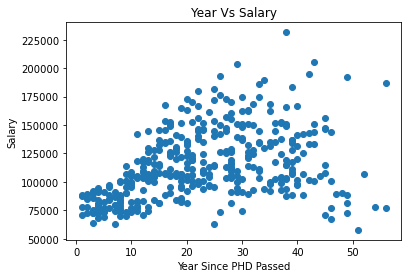

In [8]:
plt.scatter(x = df.Year_Since_PHD, y = df.Salary )
plt.xlabel('Year Since PHD Passed')
plt.ylabel('Salary')
plt.title('Year Vs Salary')
plt.show()

Here we see the graph representation of salary and PHD passed duration. PHD affect the salary in positive way.

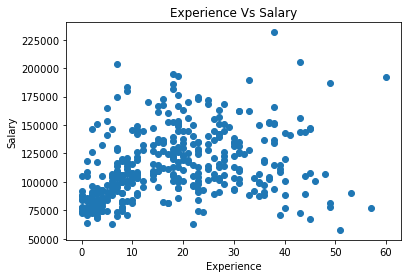

In [9]:
plt.scatter(x = df.Year_Service, y = df.Salary )
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience Vs Salary')
plt.show()

Here we see the graph representation of salary and experience. Experience also affecting the salary in positive way.

<AxesSubplot:xlabel='Year_Service', ylabel='Salary'>

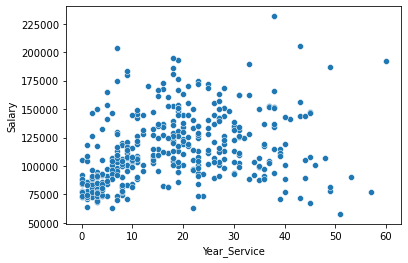

In [10]:
sns.scatterplot(x = 'Year_Service' , y = 'Salary' , data = df)

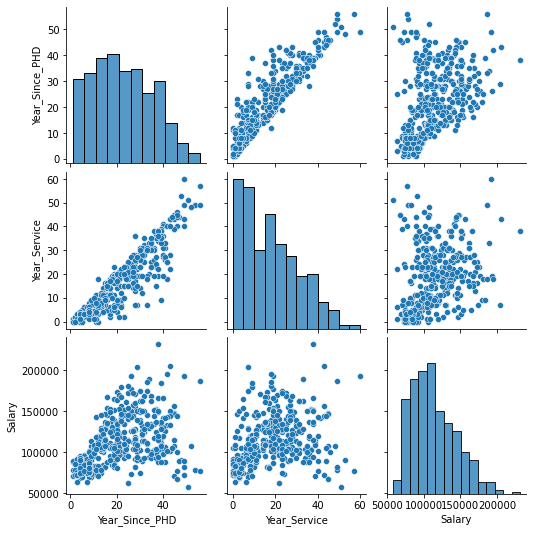

In [11]:
sns.pairplot(df)

We see pairplot also show positive relation.

In [12]:
df.isnull().sum()

Rank              0
Discipline        0
Year_Since_PHD    0
Year_Service      0
Sex               0
Salary            0
dtype: int64

There is no any null values in side the data.

In [13]:
df.corr()

,Year_Since_PHD,Year_Service,Salary
Year_Since_PHD,1.000000,0.909649,0.419231
Year_Service,0.909649,1.000000,0.334745
Salary,0.419231,0.334745,1.000000


We see the correlation values between columns. 

<AxesSubplot:>

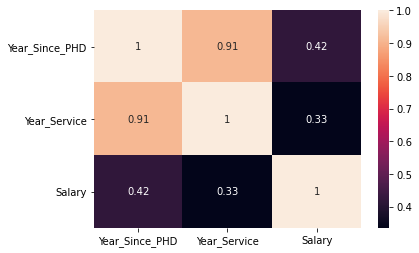

In [14]:
sns.heatmap(df.corr(), annot = True)

We represet correlation value through heatmap.

In [15]:
df.corr()['Salary'].sort_values()

Year_Service      0.334745
Year_Since_PHD    0.419231
Salary            1.000000
Name: Salary, dtype: float64

We see correlation of salary to rest of columns.

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rank'] = le.fit_transform(df['Rank'])
df['Rank'].value_counts()

2    266
1     67
0     64
Name: Rank, dtype: int64

We see there are three columns which has object values. In that we change 'Rank' into integer value because it affect salary.

In [17]:
df.head()

,Rank,Discipline,Year_Since_PHD,Year_Service,Sex,Salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500


Now we see changed column.

# Data cleaning process:

In [18]:
df.drop(['Discipline', 'Sex'], axis = 1, inplace = True)
df.head()

,Rank,Year_Since_PHD,Year_Service,Salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500


Here we drop unnecessary data from data.

In [19]:
df.skew()

Rank             -1.151164
Year_Since_PHD    0.300880
Year_Service      0.650569
Salary            0.714568
dtype: float64

There is no skewness present in data.

# Finding outliers

In [20]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(397, 4)

Calculating zscore.

In [21]:
threshold = 3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [22]:
len(np.where(z>3)[0])

4

In [23]:
df_new = df[(z<3).all(axis = 1)]
print('Old DataFrame', df.shape)
print('New DataFrame', df_new.shape)
print('Total_dropped_rows', df.shape[0] - df_new.shape[0])

Old DataFrame (397, 4)
New DataFrame (393, 4)
Total_dropped_rows 4


Finding 4 values are outliers which has been removed. 

In [24]:
loss_percent = (397-393)/397*100
print(loss_percent, '%')

1.0075566750629723 %


We see very less affect of deleting outliers.

In [25]:
df_new

,Rank,Year_Since_PHD,Year_Service,Salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500
...,...,...,...,...
392,2,33,30,103106
393,2,31,19,150564
394,2,42,25,101738
395,2,25,15,95329


We see data without outliers and unnecessary features. 

In [26]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

Spliting data into target and independent variable.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .22, random_state = 43)

In [30]:
x_train.shape

(306, 3)

In [33]:
y_train.shape

(306,)

In [34]:
y_test.shape

(87,)

In [35]:
x_test.shape

(87, 3)

In [36]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
predmnb = mnb.predict(x_test)
print(accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test, predmnb))
print(classification_report(y_test, predmnb))

0.011494252873563218
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
              precision    recall  f1-score   support

       63900       0.00      0.00      0.00         1
       71065       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         2
       73877       0.00      0.00      0.00         1
       74000       0.00      0.00      0.00         0
       77000       0.00      0.00      0.00         0
       77500       0.00      0.00      0.00         2
       77700       0.00      0.00      0.00         1
       78785       0.00      0.00      0.00         1
       80139       0.00      0.00      0.00         1
       81035       0.00      0.00      0.00         1
       81285       0.00      0.00      0.00         1
       81500       0.00      0.00      0.00         1
       82379       0.00      0.00      0.00         1
       84500       0.00      0.00      0.00     

In [29]:
svc = SVC(kernel ='rbf')
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.011494252873563218
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       63900       0.00      0.00      0.00         1
       71065       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         2
       73877       0.00      0.00      0.00         1
       74000       0.00      0.00      0.00         0
       77500       0.00      0.00      0.00         2
       77700       0.00      0.00      0.00         1
       78785       0.00      0.00      0.00         1
       80139       0.00      0.00      0.00         1
       81035       0.00      0.00      0.00         1
       81285       0.00      0.00      0.00         1
       81500       0.00      0.00      0.00         1
       82379       0.00      0.00      0.00         1
       84500       0.00      0.00      0.00         1
       86895       0.00      0.00      0.00     